In [1]:
from loica import *
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Three-strain repressilator

In [2]:
# create strains
# TODO: make a loop for this
node_1 = GeneticNetwork()
node_2 = GeneticNetwork()
node_3 = GeneticNetwork()

# add regulators, encode 3 signalling molecules as reporters. 
# All apart from LacI are diffusible
c4_reg = Reporter(name='C4', init_concentration=10, degradation_rate=1, diffusion_rate=0.5, color='red')
scb2_reg = Reporter(name='SCB2', degradation_rate=1, diffusion_rate=0.5, color='blue')
c14_reg = Reporter(name='C14', degradation_rate=1, diffusion_rate=0.5, color = 'yellow')
laci_reg = Regulator(name='LacI', degradation_rate=1)

c4_reg2 = Regulator(name='C4', degradation_rate=1, diffusion_rate=0.5)
scb2_reg2 = Regulator(name='SCB2', degradation_rate=1, diffusion_rate=0.5)
c14_reg2 = Regulator(name='C14', degradation_rate=1, diffusion_rate=0.5)
laci_reg2 = Regulator(name='LacI', degradation_rate=1)

c4_reg3 = Regulator(name='C4', degradation_rate=1, diffusion_rate=0.5)
scb2_reg3 = Regulator(name='SCB2', degradation_rate=1, diffusion_rate=0.5)
c14_reg3 = Regulator(name='C14', degradation_rate=1, diffusion_rate=0.5)
laci_reg3 = Regulator(name='LacI', degradation_rate=1)

# add regulators to nodes
node_1.add_regulator([laci_reg])
node_2.add_regulator([c4_reg2, scb2_reg2, c14_reg2, laci_reg2])
node_3.add_regulator([c4_reg3, scb2_reg3, c14_reg3, laci_reg3])

# add reporters to nodes
node_1.add_reporter([c4_reg, scb2_reg, c14_reg])

# add operators
# node 1
c4_laci = Hill1(name='Prhl', input=c4_reg, output=laci_reg, alpha=[0.1, 100], K=10, n=2)
laci_not_scb2 = Hill1(name='Plac', input=laci_reg, output=scb2_reg, alpha=[100,0.1], K=10, n=2)
node_1.add_operator([c4_laci, laci_not_scb2])

# node 2
scb2_laci = Hill1(name='Pscb', input=scb2_reg2, output=laci_reg2, alpha=[0.1, 100], K=10, n=2)
laci_not_c14 = Hill1(name='Plac', input=laci_reg2, output=c14_reg2, alpha=[100,0.1], K=10, n=2)
node_2.add_operator([scb2_laci, laci_not_c14])

# node 3
c14_laci = Hill1(name='Pcin', input=c14_reg3, output=laci_reg3, alpha=[0.1, 100], K=10, n=2)
laci_not_c4 = Hill1(name='Plac', input=laci_reg3, output=c4_reg3, alpha=[100,0.1], K=10, n=2)
node_3.add_operator([c14_laci, laci_not_c4])


### Circuits graphs

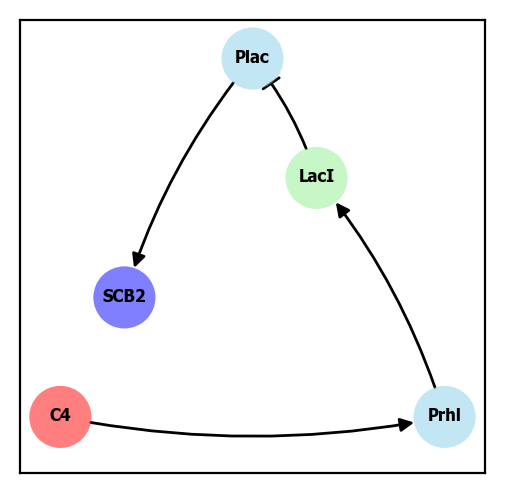

In [11]:
plt.figure(figsize=(3,3), dpi=200)
node_1.draw(pos=nx.planar_layout)

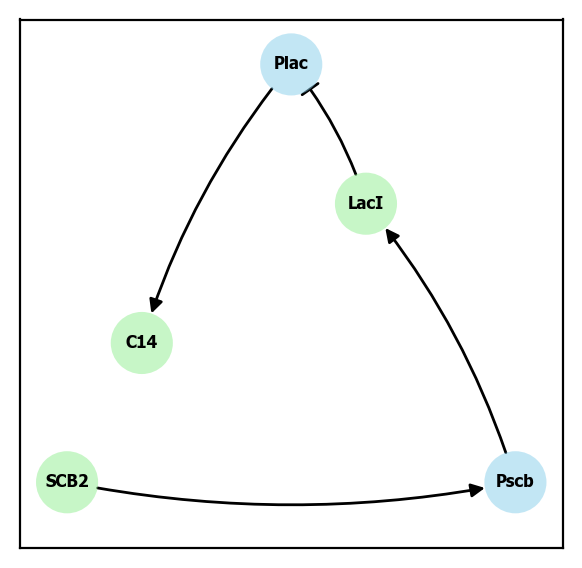

In [4]:
plt.figure(figsize=(3.5,3.5), dpi=200)
node_2.draw(pos=nx.planar_layout)

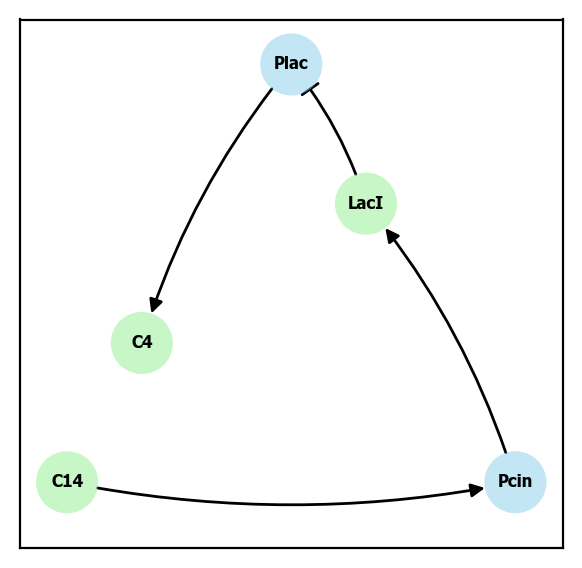

In [5]:
plt.figure(figsize=(3.5,3.5), dpi=200)
node_3.draw(pos=nx.planar_layout)

### Set up Sample and Assay

In [6]:
def growth_rate(t):
    return 1 # gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return 1 # gompertz(t, 0.01, 1, 1, 0.5)

metab1 = SimulatedMetabolism("Simulated metabolism 1", biomass, growth_rate)
metab2 = SimulatedMetabolism("Simulated metabolism 2", biomass, growth_rate)
metab3 = SimulatedMetabolism("Simulated metabolism 3", biomass, growth_rate)

In [7]:
# create consortium
repr_cons = Sample(genetic_network=[node_1, node_2, node_3], 
                    metabolism=[metab1, metab2, metab3])

In [8]:
for chemical in ['C4', 'SCB2', 'C14']:
    repr_cons.set_extracel_degr(chemical, 1)
# test
print(c4_reg.ext_degr_rate)
print(scb2_reg2.ext_degr_rate)
print(c14_reg3.ext_degr_rate)
print(repr_cons.options)

1
1
1
[<loica.genetic_network.GeneticNetwork object at 0x00000255F5657AC0>, <loica.genetic_network.GeneticNetwork object at 0x00000255F56571C0>, <loica.genetic_network.GeneticNetwork object at 0x00000255F5657040>, 'extracellular space']


In [9]:
assay = Assay([repr_cons], 
              n_measurements=50, 
              interval=0.1,
              name=f'Signal measurements from repressilator consortium',
              description='Simulated signal expression in repressilator consortium'
             )

### ODE simulation

In [ ]:
assay.run(stochastic=True)

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='C4'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='SCB2'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='C14'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='Biomass'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='Biomass1'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend(['C4', 'SCB2', 'C14', 'Total OD', "Node 1 OD"])